a. Probabilitas nasabah menikah dengan tanggungan > 1: 22.31%
b. Probabilitas nasabah urban dengan penghasilan di atas rata-rata: 9.45%


<Figure size 1000x600 with 0 Axes>

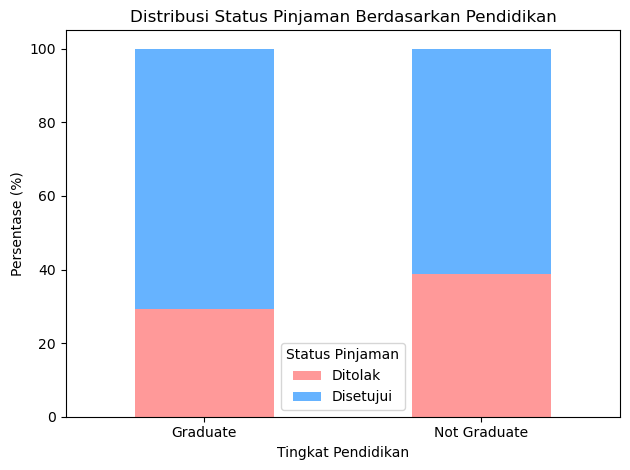

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memuat dataset
try:
    data = pd.read_excel('loan_data_set.xlsx', sheet_name='loan_data_set')
except:
    print("Pastikan file 'loan_data_set.xlsx' ada di direktori yang sama")
    exit()

# 2. Pembersihan data awal
# Mengubah '3+' menjadi 3 di kolom Dependents
data['Dependents'] = data['Dependents'].replace('3+', '3').astype(float)

# Mengisi nilai yang hilang dengan modus untuk kolom kategorikal
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

# Mengisi nilai yang hilang dengan median untuk kolom numerik
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

# 3. Menghitung probabilitas bersyarat

# a. Probabilitas nasabah yang sudah menikah dan memiliki tanggungan > 1
married_and_dependents = data[(data['Married'] == 'Yes') & (data['Dependents'] > 1)]
prob_a = len(married_and_dependents) / len(data)
print(f"a. Probabilitas nasabah menikah dengan tanggungan > 1: {prob_a:.2%}")

# b. Probabilitas nasabah di kawasan perkotaan dengan penghasilan di atas rata-rata
avg_income = data['ApplicantIncome'].mean()
urban_high_income = data[(data['Property_Area'] == 'Urban') & (data['ApplicantIncome'] > avg_income)]
prob_b = len(urban_high_income) / len(data)
print(f"b. Probabilitas nasabah urban dengan penghasilan di atas rata-rata: {prob_b:.2%}")

# c. Visualisasi distribusi probabilitas bersyarat berdasarkan pendidikan

# Menghitung probabilitas bersyarat Loan_Status berdasarkan Education
education_loan_status = pd.crosstab(data['Education'], data['Loan_Status'], normalize='index') * 100

# Visualisasi
plt.figure(figsize=(10, 6))
education_loan_status.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Distribusi Status Pinjaman Berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Persentase (%)')
plt.legend(title='Status Pinjaman', labels=['Ditolak', 'Disetujui'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
